# 일원분산 (ANOVA) 분석

In [1]:
import pandas as pd

In [2]:
# 데이터 불러오기 및 확인
df = pd.read_csv('datas2/지점별_일별판매량.csv', encoding = 'euc-kr')
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   일자      30 non-null     int64
 1   지점A     30 non-null     int64
 2   지점B     30 non-null     int64
 3   지점C     30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [3]:
# 데이터 분할 (결측이 포함되어 있을 수 있으므로 dropna를 사용)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values


<function matplotlib.pyplot.show(close=None, block=None)>

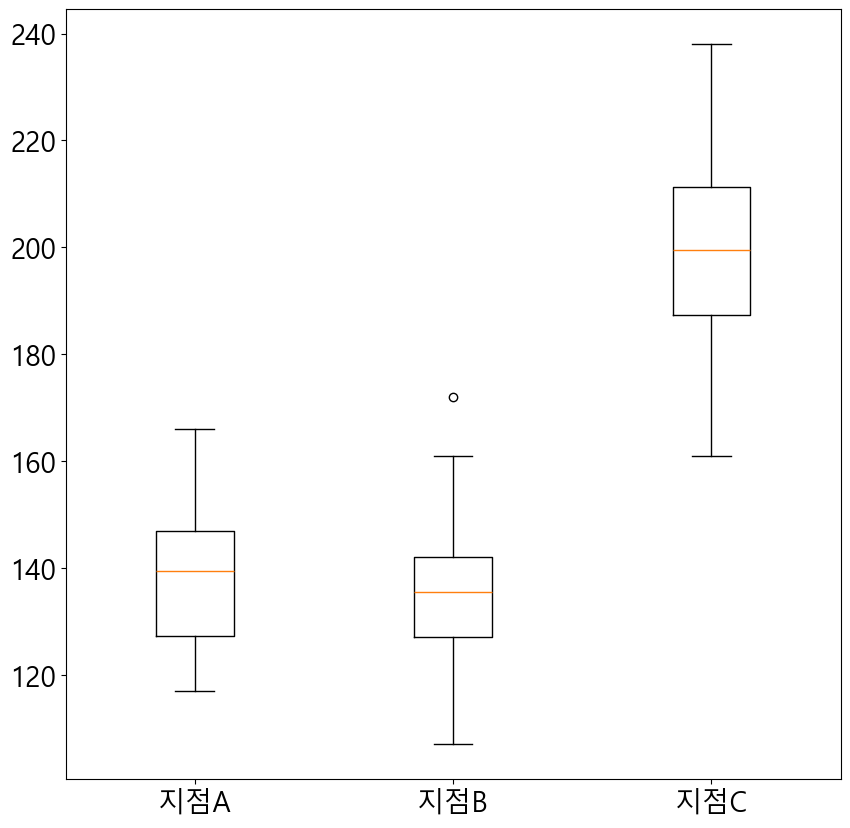

In [4]:
# 박스플롯으로 시각화
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 10)
plt.boxplot([A, B, C])
plt.xticks([1, 2, 3], ['지점A', '지점B', '지점C'])
plt.show

## 정규성 검정
- Shapiro-Wilk 검정

In [5]:
from scipy import stats as st

In [6]:
print(st.shapiro(A - B, ))
print(st.shapiro(A - C))
print(st.shapiro(B - C))


ShapiroResult(statistic=np.float64(0.9806113784179772), pvalue=np.float64(0.8415709891789398))
ShapiroResult(statistic=np.float64(0.9756594683381399), pvalue=np.float64(0.7021590584338278))
ShapiroResult(statistic=np.float64(0.9766118849758917), pvalue=np.float64(0.7301124246612438))


[해석]
- 모두 p-value > 0.05 : 각 변수간의 차이가, 모두 정규 분포를 뛴다는 것을 알 수 있음.

## 등분산성 검정
- 레빈 검정 (Levene's Test) - 권장
- center='median'이 기본값이며, 평균(mean)보다 이상치에 덜 민감하여 더 안정적임

In [7]:
levene_st, levene_p_val = st.levene(A, B, C, center='median')
print(f'levene_st : {levene_st}, levene_p_val : {levene_p_val}')

levene_st : 1.244640322359082, levene_p_val : 0.29312188689352464


[해석]
- p-value > 0.05, 샘플 간 분산이 유사하다고 판단할 수 있음

## 일원분산 분석 수행

In [8]:
print(st.f_oneway(A, B, C))

F_onewayResult(statistic=np.float64(178.43825416847133), pvalue=np.float64(1.6337420285664832e-31))


[해석]
- p-value <= 0.05 : 거의 0에 가까우므로, 귀무가설을 강력하게 기각함
최소 하나의 그룹은 다른 그룹의 평균과 다르다고 판단할 수 있음

## 사후 분석

In [10]:
from statsmodels.stats import multicomp as mp

In [11]:
# 분석 대상 데이터
Data = A.tolist() + B.tolist() + C.tolist()
# 각 값이 속한 그룹 이름
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)
print(Data)
print(Group)

[124, 147, 129, 123, 147, 149, 140, 142, 124, 166, 127, 130, 139, 121, 149, 155, 140, 150, 137, 144, 136, 126, 150, 142, 149, 127, 140, 138, 128, 117, 118, 141, 130, 127, 107, 140, 146, 122, 160, 157, 141, 142, 150, 136, 157, 107, 172, 126, 135, 115, 133, 132, 127, 128, 142, 161, 140, 125, 142, 135, 216, 214, 212, 179, 222, 238, 218, 200, 186, 188, 216, 183, 198, 199, 187, 183, 190, 161, 203, 192, 235, 208, 187, 201, 196, 202, 209, 179, 197, 204]
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


In [12]:
# 사후 분석
print(mp.pairwise_tukeyhsd(Data, Group))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -1.4 0.9297 -10.5741  7.7741  False
     A      C  62.2333    0.0  53.0592 71.4075   True
     B      C  63.6333    0.0  54.4592 72.8075   True
-----------------------------------------------------


[해석]

- 결론: [A, B] / [C]로 데이터가 구분됨
- reject False, p-adj > 0.05
    - A - B는 유의한 차이가 존재하지 않음
- reject True, p-adj <= 0.05
    - A - C는 유의한 차이 존재
- reject True, p-adj <= 0.05
    - B - C는 유의한 차이 존재
      
[tip] reject의 의미
- False : 귀무가설 기각하지 않음.
- True : 귀무가설을 기각함.
  
[tip] statsmodels 라이브러리
- !pip install statsmodels
- 회귀 분석, 시계열 분석, 분산 분석(ANOVA), 가설 검정 등 다양한 통계 기법을 포함하고 있어, 데이터 분석 및 경제학, 사회과학 연구 등에서 널리 사용
